# Real Estate Revelations: The Power of Predictive Modeling

## Introduction

In the fast-paced world of real estate, every smart upgrade can make or break a sale. Now, imagine if you had a tool that could tell you exactly which home renovations would boost property values the most. 

Picture this: a real estate agent, with the help of advanced data analytics, effortlessly identifying the best improvements for any home, ensuring every dollar spent translates into a significant increase in value. 

Welcome to our real estate valuation project, where we combine the power of modern statistics with the practical needs of home renovation. Using state-of-the-art linear regression models, we uncover the hidden gems in the data, guiding you through the maze of property enhancements to find the most profitable path. 

Join us on this journey to turn guesswork into strategy and potential into profit, making homes not just beautiful places to live, but smart investments for the future.

## Problem Statement
Determining which home renovations will most effectively increase property values is a significant challenge for real estate agencies, homeowners, and property investors. 

Without precise, data-driven guidance, resources are often allocated to improvements that yield suboptimal returns, leading to inefficiencies and missed opportunities for maximizing property values. 

This project aims to address this problem by leveraging advanced linear regression models to identify key features and renovations that significantly impact home values. By providing clear, actionable insights, the project seeks to empower stakeholders to make informed decisions, optimize resource allocation, and ultimately enhance the market value of properties.

## Objectives

### 1. Data cleaning and preparation.

To Obtain a dataset that contains relevant information, clean the data and prepare it for modeling

### 2. Feature Selection and Modelling

To determine the features in the dataset that are most predictive and use them to build linear regression models.

### 3. Model evaluation and validation

To use metrics to evaluate and validate the linear regression model built.

### 4. Provide Recommendations

To use the insights from the data and the models to offer actionable insights.

## Data Understanding
This project uses the King County House Sales dataset, which is available in the file `kc_house_data`.csv. 

The dataset includes comprehensive information on house sales in King County, providing valuable insights into various attributes that influence property values.

This dataset is highly suitable for addressing the problem of identifying key home renovations that increase property values. This is because it has a wide range of features that are crucial in analysing house value.

## Data loading

First, we import the necessary python libraries

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we load the dataset using pandas, and look at the first 5 rows.

In [2]:
data = pd.read_csv('./data/kc_house_data.csv')
data.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Description of columns

In [3]:
data.shape

(21597, 21)

The dataset contains 21 columns and 21,597 rows.

Now to go into more detail on the columns we have. We will use the `column_names.md` file to get more information about our columns.

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house. An index from 0 to 4 of how good the view of the property was.
* `condition` - How good the overall condition of the house is. Related to maintenance of house. An index from 1 to 5 on the condition of the house.
* `grade` - Overall grade of the house. Related to the construction and design of the house, where 1-3 is poor, 4-6 is low average, 7 is average, 8-9 is good, and 10-13 is excellent.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

# Initial Data Exploration

In [5]:
# Looking at a summary of column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Observations

* `id` - integer ( Should be a string)

* `date` - object (Should be datetime)

* `bathrooms` - float64 (Should be integer, as there are no half bathrooms)

* `floors` - float64 (Should be integer)

* `condition` - object (Should be integer, An index from 1 to 5 on the condition of the house.)

* `grade`: object (Should be split into the grade number, an integer, and the grade comment, which is a string)

* `sqft_basement`: object (Should be converted to a float)

In [6]:
# Convert the 'id' column to a string
data['id'] = data['id'].astype(str)

# Converting 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Converting 'bathrooms' column from float to the nearest integer
data['bathrooms'] = data['bathrooms'].round().astype(int)

# Converting the 'floors' column from float to the nearest integer
data['floors'] = data['floors'].round().astype(int)

In [7]:
# Checking the unique values in 'condition' column
data['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [8]:
# Define a mapping for the condition values to integers
condition_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5
}

# Apply the mapping to the 'condition' column
data['condition'] = data['condition'].map(condition_mapping)

# Confirm the conversion
data['condition'].head()


0    3
1    3
2    3
3    5
4    3
Name: condition, dtype: int64

In [9]:
# Check the unique values in the 'grade' column
data['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [10]:
# Define a mapping for the grade values to integers
grade_mapping = {
    '3 Poor': 1,
    '4 Low': 2,
    '5 Fair': 3,
    '6 Low Average': 4,
    '7 Average': 5,
    '8 Good': 6,
    '9 Better': 7,
    '10 Very Good': 8,
    '11 Excellent': 9,
    '12 Luxury': 10,
    '13 Mansion': 11
}

# Apply the mapping to the 'grade' column
data['grade_numeric'] = data['grade'].map(grade_mapping)

# Create a new column to describe the resulting condition
grade_description = {
    1: 'Poor',
    2: 'Low',
    3: 'Fair',
    4: 'Low Average',
    5: 'Average',
    6: 'Good',
    7: 'Better',
    8: 'Very Good',
    9: 'Excellent',
    10: 'Luxury',
    11: 'Mansion'
}

data['grade_description'] = data['grade_numeric'].map(grade_description)

# Confirm the new columns
data[['grade', 'grade_numeric', 'grade_description']].head()


,grade,grade_numeric,grade_description
0,7 Average,5,Average
1,7 Average,5,Average
2,6 Low Average,4,Low Average
3,7 Average,5,Average
4,8 Good,6,Good


In [11]:
# Replace non-numeric values with NaN and convert the column to numeric
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'].replace('?', pd.NA), errors='coerce')

# Confirm the conversion
data['sqft_basement'].dtype

dtype('float64')

In [12]:
# Checking the unique values in 'waterfront'
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [13]:
# Convert 'waterfront' values to 1 and 0
waterfront_mapping = {
    'YES': 1,
    'NO': 0
}

data['waterfront'] = data['waterfront'].map(waterfront_mapping)

# Confirm the conversion
data['waterfront'].head()

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

In [14]:
# Looking for null values
data.isna().sum()

id                      0
date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront           2376
view                   63
condition               0
grade                   0
sqft_above              0
sqft_basement         454
yr_built                0
yr_renovated         3842
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
grade_numeric           0
grade_description       0
dtype: int64

In [15]:
# Checking the percentage of the missing values
(data.isna().sum()/data.shape[0])*100

id                    0.000000
date                  0.000000
price                 0.000000
bedrooms              0.000000
bathrooms             0.000000
sqft_living           0.000000
sqft_lot              0.000000
floors                0.000000
waterfront           11.001528
view                  0.291707
condition             0.000000
grade                 0.000000
sqft_above            0.000000
sqft_basement         2.102144
yr_built              0.000000
yr_renovated         17.789508
zipcode               0.000000
lat                   0.000000
long                  0.000000
sqft_living15         0.000000
sqft_lot15            0.000000
grade_numeric         0.000000
grade_description     0.000000
dtype: float64

Missing Values Observations:
* `waterfront` has some missing values (11% of the data)

* `view` has a few missing values (0.29% of the data)

* `sqft_basement` has a few nissing values (2.1% of the data)

* `yr_renovated` has many missing values (17.79% of the data).


Srategies for dealing with the missing values:

1. `waterfront` (11%):

    Since waterfront is a categorical variable, we can fill the missing values with the most frequent category: 'NO', which is 0

2. `yr_renovated` (17.79%):
    
    We can fill the missing values with 0. 
    
    A value of 0 might indicate that the house was never renovated.

3. `sqft_basement` (2.1%)

    we can also fill in with the mode

In [16]:
# Calculate the mode of 'sqft_basement'
mode_sqft_basement = data['sqft_basement'].mode()[0]

# Impute missing values in 'sqft_basement' with the mode
data['sqft_basement'].fillna(mode_sqft_basement, inplace=True)

# Impute missing values in 'waterfront' with the most common value
most_common_waterfront = data['waterfront'].mode()[0]
data['waterfront'].fillna(most_common_waterfront, inplace=True)

# Impute missing values for 'yr_renovated' with 0
data['yr_renovated'] = data['yr_renovated'].fillna(0)

# Impute missing values in `view` with the mode
most_common_view = data['view'].mode()[0]
data['view'].fillna(most_common_view, inplace=True)

# Verify if there are any missing values left
data.isna().sum()

/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_70680/3090519027.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sqft_basement'].fillna(mode_sqft_basement, inplace=True)
/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_70680/3090519027.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
grade_numeric        0
grade_description    0
dtype: int64

Now lets also map `views` to numeric values.

In [17]:
# Define a mapping for the view values to a numeric scale
view_mapping = {
    'NONE': 0,
    'FAIR': 1,
    'AVERAGE': 2,
    'GOOD': 3,
    'EXCELLENT': 4
}

# Apply the mapping to the 'view' column
data['view'] = data['view'].map(view_mapping)

# Confirm the conversion
data['view'].head()


0    0
1    0
2    0
3    0
4    0
Name: view, dtype: int64

Now we can check for duplicate entries in our data

In [18]:
data.duplicated().sum()

0

We have none. 

Next we can calculate the cardinality of each column

In [19]:
data.nunique()

id                   21420
date                   372
price                 3622
bedrooms                12
bathrooms                9
sqft_living           1034
sqft_lot              9776
floors                   4
waterfront               2
view                     5
condition                5
grade                   11
sqft_above             942
sqft_basement          303
yr_built               116
yr_renovated            70
zipcode                 70
lat                   5033
long                   751
sqft_living15          777
sqft_lot15            8682
grade_numeric           11
grade_description       11
dtype: int64

We can tell that we have some entries that have the same ids. let's extract those entries and have a closer look to check if they are duplicates

In [20]:
# Find entries with the same id
duplicate_ids = data[data.duplicated(subset=['id'], keep=False)]

# Count the number of such entries
duplicate_ids_count = duplicate_ids.shape[0]

duplicate_ids, duplicate_ids_count


(               id       date      price  bedrooms  bathrooms  sqft_living  \
 93     6021501535 2014-07-25   430000.0         3          2         1580   
 94     6021501535 2014-12-23   700000.0         3          2         1580   
 313    4139480200 2014-06-18  1380000.0         4          3         4290   
 314    4139480200 2014-12-09  1400000.0         4          3         4290   
 324    7520000520 2014-09-05   232000.0         2          1         1240   
 ...           ...        ...        ...       ...        ...          ...   
 20654  8564860270 2015-03-30   502000.0         4          2         2680   
 20763  6300000226 2014-06-26   240000.0         4          1         1200   
 20764  6300000226 2015-05-04   380000.0         4          1         1200   
 21564  7853420110 2014-10-03   594866.0         3          3         2780   
 21565  7853420110 2015-05-04   625000.0         3          3         2780   
 
        sqft_lot  floors  waterfront  view  ...  sqft_basement

We can see that they are the same houses, with different selling dates. We can assume that these are houses that have been sold more than once at different times.

So lets sort the date in ascending order and delete the first sale entry and only keep the latest house sale.

In [21]:
# Sort the data by date in ascending order
data = data.sort_values(by='date')

# Drop the first duplicate keeping the last entry
data = data.drop_duplicates(subset=['id'], keep='last')

# Confirm the number of rows remaining after dropping duplicates
data.shape

(21420, 23)

We can see that our resulting data has **21,420 rows** and **23 columns**

# Feature Engineering
We have already created the new column `grade_numeric` to help us with our analysis.

We can consider creating the following new features:

1. `age_of_house`: age = 2024 - yr_built
2. `renovation_age`: renovation_age = 2024 - yr_renovated (if renovated, otherwise 0)
3. `total_square_footage`: total_sqft = sqft_living + sqft_basement

In [22]:
# 1. Age of the house
data['age_of_house'] = 2024 - data['yr_built']

# 2. Renovation age
data['renovation_age'] = data.apply(lambda row: 2024 - row['yr_renovated'] if row['yr_renovated'] > 0 else 0, axis=1)

# 3. Total square footage
data['total_square_footage'] = data['sqft_living'] + data['sqft_basement']

# Display the new columns to confirm the changes
data[['age_of_house', 'renovation_age', 'total_square_footage']].head()


,age_of_house,renovation_age,total_square_footage
7316,70,0.0,1450.0
20586,12,0.0,3310.0
1040,48,0.0,2740.0
20543,15,0.0,1980.0
9587,73,0.0,3500.0


We can drop the following columns as we will not be using them in our analysis: 

`zipcode`, `lat`, `long`

In [23]:
# Drop the columns 'zipcode', 'lat', and 'long'
data.drop(columns=['zipcode', 'lat', 'long'], inplace=True)

# Confirm the columns have been dropped
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'grade_numeric', 'grade_description',
       'age_of_house', 'renovation_age', 'total_square_footage'],
      dtype='object')

# Summary Statistics

In [24]:
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,grade_numeric,age_of_house,renovation_age,total_square_footage
count,21420,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,2014-10-29 17:13:04.537815040,5.418614e+05,3.373950,2.061951,2083.132633,1.512804e+04,1.536461,0.006816,0.233987,3.410784,1791.170215,285.937021,1971.092997,68.956723,1988.384080,12775.718161,5.662792,52.907003,0.966713,2369.069655
min,2014-05-02 00:00:00,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,1.000000,9.000000,0.000000,370.000000
25%,2014-07-22 00:00:00,3.249500e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000,5.000000,27.000000,0.000000,1500.000000
50%,2014-10-17 00:00:00,4.505500e+05,3.000000,2.000000,1920.000000,7.614000e+03,2.000000,0.000000,0.000000,3.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,5.000000,49.000000,0.000000,2170.000000
75%,2015-02-18 00:00:00,6.450000e+05,4.000000,2.000000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,2220.000000,550.000000,1997.000000,0.000000,2370.000000,10086.250000,6.000000,72.000000,0.000000,2980.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,11.000000,124.000000,90.000000,17670.000000
std,NaN,3.675569e+05,0.925405,0.754611,918.808412,4.153080e+04,0.554534,0.082280,0.765437,0.650035,828.692965,440.012962,29.387141,364.552298,685.537057,27345.621867,1.171971,29.387141,5.872946,1176.387969


# Initial visualizations

First we can have a look at the distribution of our numerical variables

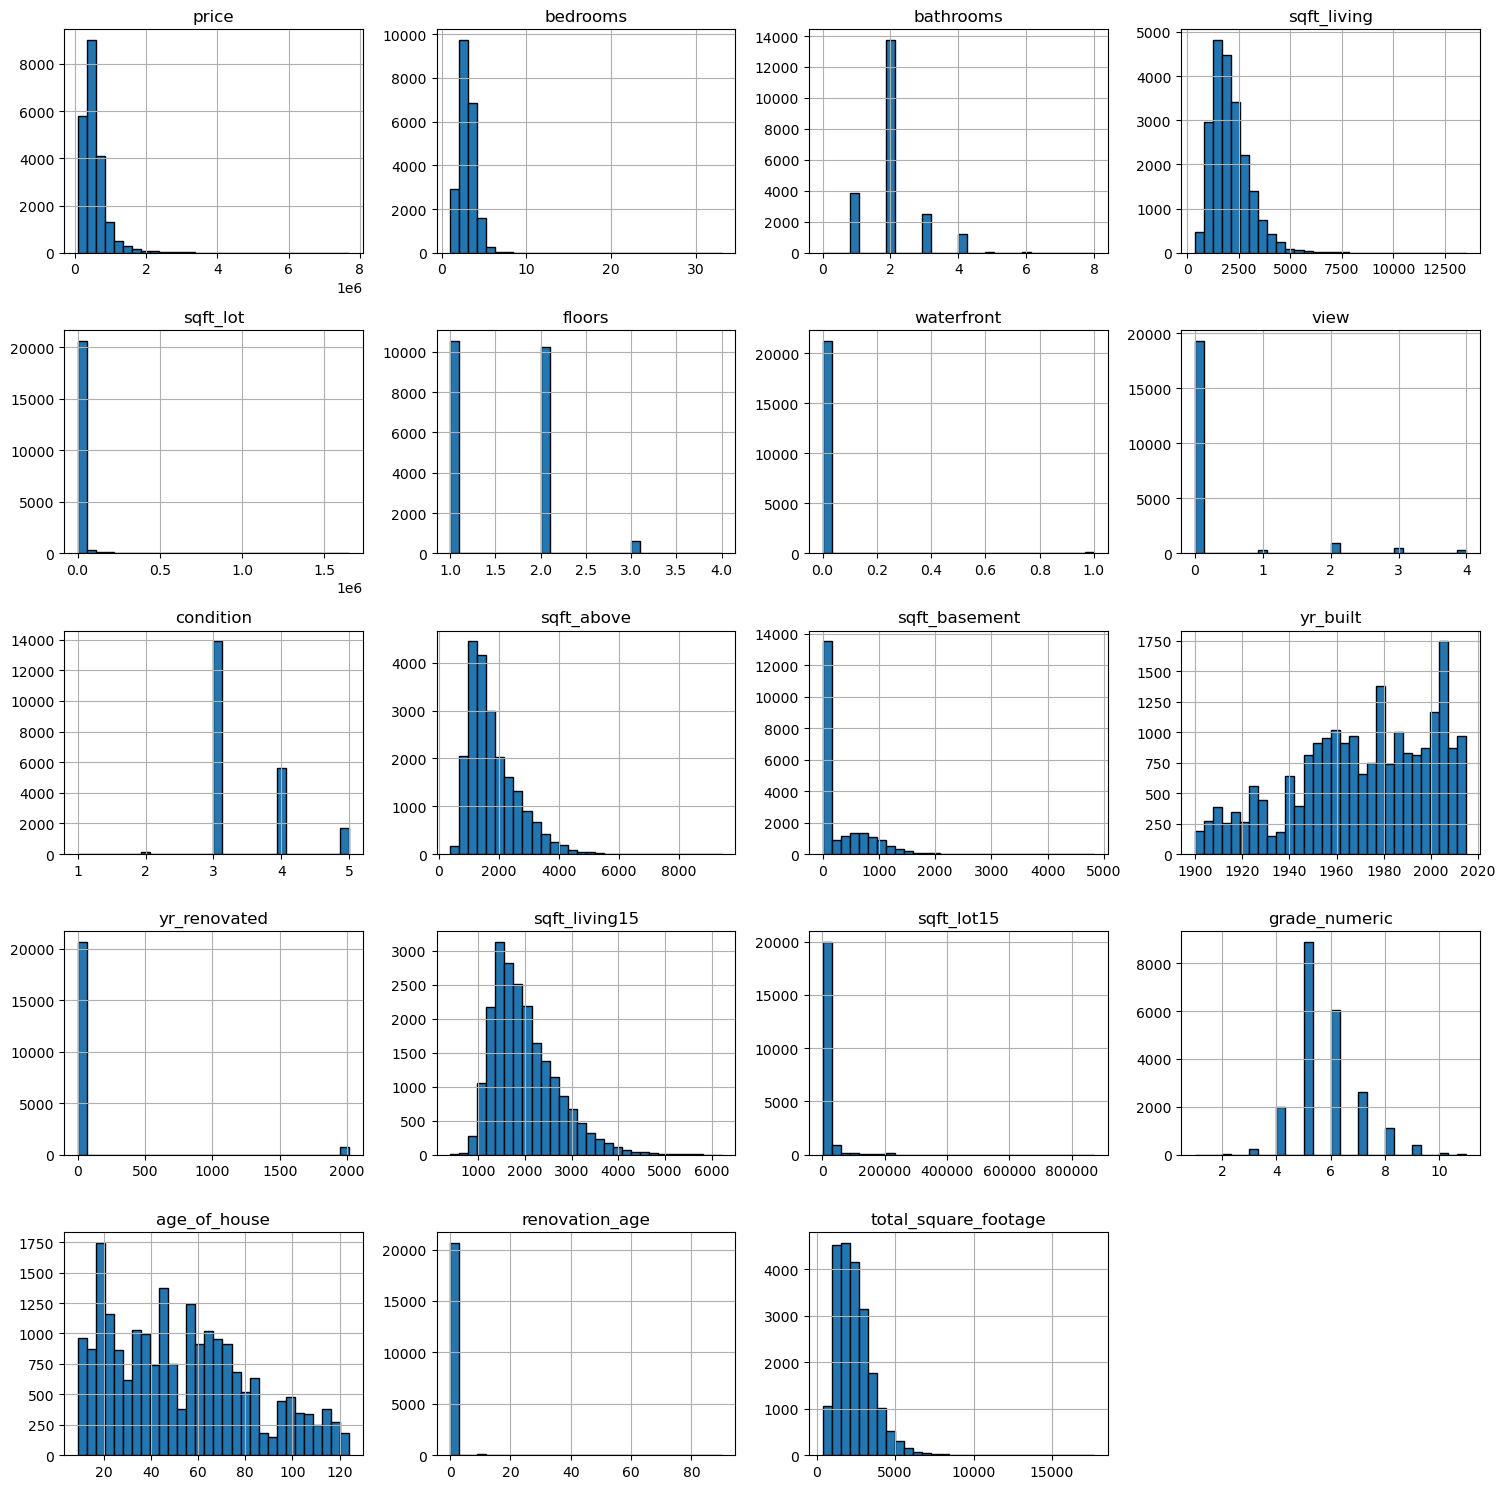

In [25]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
data[numerical_columns].hist(figsize=(15, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


## Observations
1. **Price**:

    * The distribution is right-skewed, indicating that most houses are priced below $1 million, with a few very high-priced properties.

2. **Bedrooms**:

    * Most houses have 3 to 4 bedrooms. There are few houses with more than 6 bedrooms, and very few with exceptionally high bedroom counts.

3. **Bathrooms**:

    * Most houses have between 1 and 3 bathrooms. The distribution shows a right skew with fewer houses having more than 4 bathrooms.

4. **Sqft_Living**:

    *The distribution is right-skewed, with most houses having less than 4000 sqft of living space.

5. **Sqft Lot**:

    * The distribution is heavily right-skewed with most houses having lot sizes less than 15,000 sqft. There are a few outliers with very large lot sizes.

6. **Floors**:

    * Most houses have either 1 or 2 floors, with very few having 3 or more floors.

7. **Waterfront**:

    * The distribution indicates that a very small number of houses are on the waterfront.

8. **View**:

    * The majority of houses have a view rating of 0 (none). Other view ratings (1 to 4) are much less common.

9. **Condition**:

    * Most houses have a condition rating of 3 (Average) or 4 (Good), with fewer houses rated as 1 (Poor) or 5 (Very Good).

10. **Sqft Above**:

    * The distribution is right-skewed, similar to sqft_living, indicating that most houses have less than 3000 sqft above ground.

11. **Sqft Basement**:

    * Most houses either have no basement or have a basement size less than 1500 sqft. The distribution shows a sharp drop-off after that.

12. **Yr Built**:

    * The distribution is relatively uniform with peaks around the 1950s and 2000s, indicating periods of increased construction.

13. **Yr Renovated**:

    * Most houses have a renovation year of 0 (indicating no renovation). For those that have been renovated, the distribution shows peaks in more recent years.

14. **Sqft Living15**:

    * The distribution is right-skewed, with most houses having neighboring houses with less than 4000 sqft of living space.

15. **Sqft Lot15**:


    * The distribution is heavily right-skewed with most houses having neighboring lot sizes less than 20,000 sqft, but some have much larger neighboring lot sizes.

16. **Grade Numeric**:

    * Most houses have a grade between 5 (Average) and 7 (Good). Higher grades are less common.

17. **Age of House**:

    * The distribution indicates that many houses are between 20 to 80 years old, with fewer houses being either very new or very old.

18. **Renovation Age**:

    * Most houses either have a renovation age of 0 or were renovated in the past 20 years. There are fewer houses with renovations older than that.

19. Total Square Footage:

    * The distribution is right-skewed with most houses having a total square footage (living + basement) of less than 4000 sqft.

## Calculating the correlation matrix

In [26]:
# Calculating the correlation matrix
correlation_matrix = data[numerical_columns].corr()

correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,grade_numeric,age_of_house,renovation_age,total_square_footage
price,1.000000,0.309640,0.519198,0.701295,0.088789,0.243406,0.264915,0.392787,0.034219,0.604424,0.321264,0.051012,0.118278,0.583792,0.082045,0.666835,-0.051012,0.083563,0.667905
bedrooms,0.309640,1.000000,0.488575,0.579069,0.032490,0.179769,-0.002205,0.078353,0.025893,0.480242,0.297093,0.155241,0.017470,0.394949,0.030570,0.357988,-0.155241,-0.001575,0.563401
bathrooms,0.519198,0.488575,1.000000,0.702395,0.089964,0.327249,0.064633,0.200012,-0.070348,0.599946,0.328880,0.376916,0.062769,0.497687,0.087315,0.591285,-0.376916,0.030352,0.671613
sqft_living,0.701295,0.579069,0.702395,1.000000,0.172586,0.321002,0.104737,0.280839,-0.061677,0.876533,0.427998,0.316646,0.050851,0.756186,0.183837,0.762477,-0.316646,0.029783,0.941129
sqft_lot,0.088789,0.032490,0.089964,0.172586,1.000000,-0.002124,0.021429,0.075360,-0.009169,0.183210,0.014839,0.052312,0.004991,0.143805,0.717743,0.113656,-0.052312,0.011499,0.140347
floors,0.243406,0.179769,0.327249,0.321002,-0.002124,1.000000,0.021157,0.026096,-0.226053,0.487413,-0.242493,0.381381,0.011141,0.242183,-0.010793,0.407815,-0.381381,0.005354,0.160014
waterfront,0.264915,-0.002205,0.064633,0.104737,0.021429,0.021157,1.000000,0.381654,0.016608,0.071737,0.083317,-0.024842,0.074096,0.083921,0.030653,0.082905,0.024842,0.085299,0.112968
view,0.392787,0.078353,0.200012,0.280839,0.075360,0.026096,0.381654,1.000000,0.044678,0.165289,0.270104,-0.056171,0.089982,0.277555,0.073381,0.247632,0.056171,0.086958,0.320376
condition,0.034219,0.025893,-0.070348,-0.061677,-0.009169,-0.226053,0.016608,0.044678,1.000000,-0.161483,0.168991,-0.365129,-0.056264,-0.095256,-0.003450,-0.150508,0.365129,-0.021880,0.015037
sqft_above,0.604424,0.480242,0.599946,0.876533,0.183210,0.487413,0.071737,0.165289,-0.161483,1.000000,-0.051707,0.422977,0.020078,0.731887,0.194445,0.756221,-0.422977,0.012486,0.665269


1. Price: 
    * Highly correlated with sqft_living (0.701917), grade_numeric (0.667951), and total_square_footage (0.668185).

    * Moderately correlated with bathrooms (0.519628), sqft_above (0.605368), and sqft_living15 (0.585241).

2. Bedrooms:

    * Moderately correlated with sqft_living (0.578212), total_square_footage (0.562662), and sqft_above (0.479386).

3. Bathrooms:

    * Highly correlated with sqft_living (0.702719) and total_square_footage (0.671770).

4. Sqft Living:

    Very highly correlated with total_square_footage (0.941166).

    Highly correlated with sqft_above (0.876448) and bathrooms (0.702719).

5. Floors:

    * Shows some correlation with price (0.244832) and bathrooms (0.327893).

6. Waterfront:

    * Moderately correlated with price (0.264306) and view (0.393497).

7. View:

    * Moderately correlated with price (0.393497) and sqft_living (0.281715).

8. Condition:

    * Shows low correlation with most features.

9. Sqft Above:

    * Very highly correlated with sqft_living (0.876448).

10. Sqft Basement:

    * Moderately correlated with price (0.321108) and total_square_footage (0.708763).

11. Yr Built:

    * Shows low correlation with most features.

12. Yr Renovated:

    * Shows some correlation with price (0.117855).

13. Sqft Living15:

    * Highly correlated with sqft_living (0.756402) and total_square_footage (0.665161).

14. Sqft Lot15:

    * Highly correlated with sqft_lot (0.718204).

15. Grade Numeric:

    * Highly correlated with price (0.667951) and sqft_living (0.762779).

16. Age of House:

    * Negatively correlated with price (-0.053953) and grade_numeric (-0.199762).

17. Renovation Age:

    * Shows low correlation with most features.

18. Total Square Footage:

    * Very highly correlated with sqft_living (0.941166).

### Visualizing The Correlation Matrix

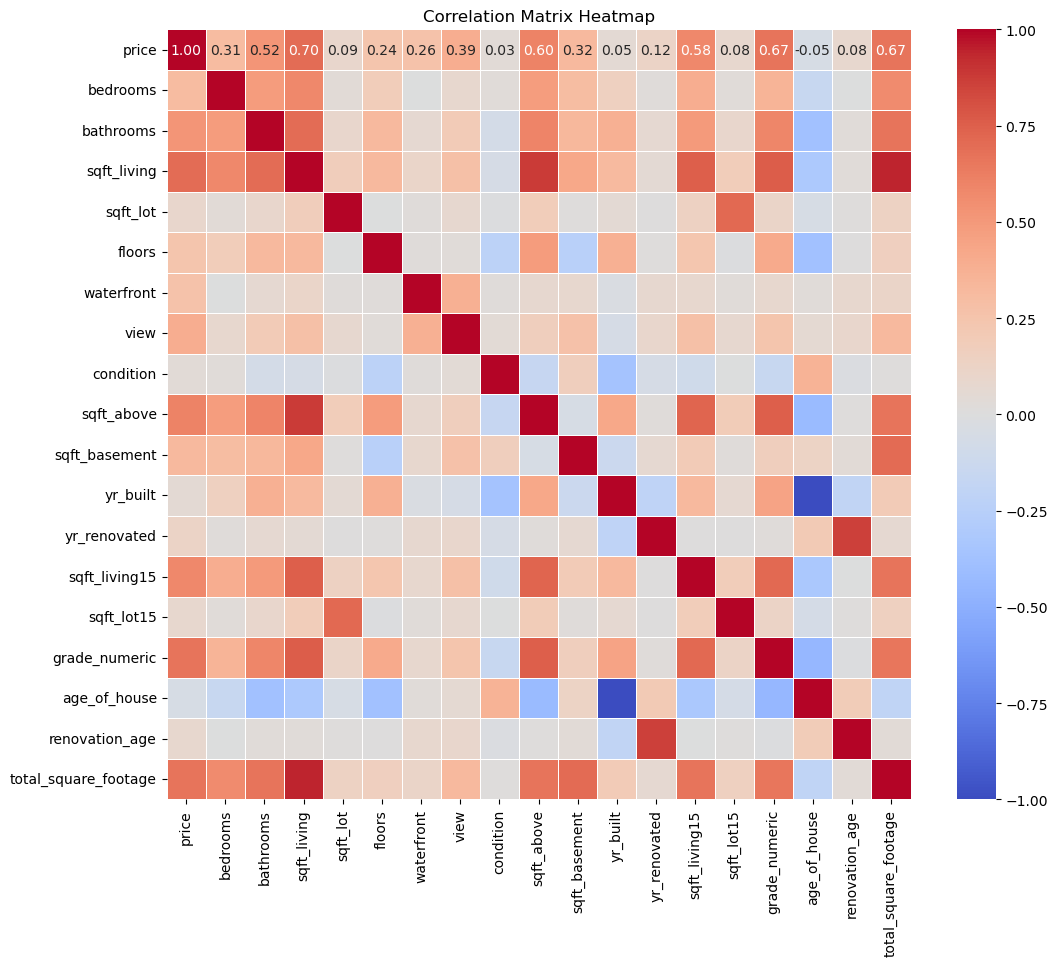

In [27]:
# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Calculating correlation of columns with price

In [28]:
# Extract correlations with price and sort them in descending order
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Select only positive correlations
positive_price_correlations = price_correlations[price_correlations > 0]

# select only negative correlations
negative_price_correlations = price_correlations[price_correlations < 0]

# show them
positive_price_correlations, negative_price_correlations

(price                   1.000000
 sqft_living             0.701295
 total_square_footage    0.667905
 grade_numeric           0.666835
 sqft_above              0.604424
 sqft_living15           0.583792
 bathrooms               0.519198
 view                    0.392787
 sqft_basement           0.321264
 bedrooms                0.309640
 waterfront              0.264915
 floors                  0.243406
 yr_renovated            0.118278
 sqft_lot                0.088789
 renovation_age          0.083563
 sqft_lot15              0.082045
 yr_built                0.051012
 condition               0.034219
 Name: price, dtype: float64,
 age_of_house   -0.051012
 Name: price, dtype: float64)

**Top Correlations with price**:

1. `sqft_living`             0.701917
2. `total_square_footage`    0.668185
3. `grade_numeric`           0.667951
4. `sqft_above`              0.605368
5. `sqft_living15`           0.585241
6. `bathrooms`               0.519628
7. `view`                    0.393497
8. `sqft_basement`           0.321108
9. `bedrooms`                0.308787
10. `waterfront`              0.264306
11. `floors`                  0.244832
12. `yr_renovated`            0.117855
13. `sqft_lot`                0.089876
14. `sqft_lot15`              0.082845
15. `renovation_age`          0.082779
16. `yr_built`                0.053953
17. `condition`               0.036056

**Negative correlation with price**

18. `age_of_house`   -0.053953

## Visualizing the correlations with price

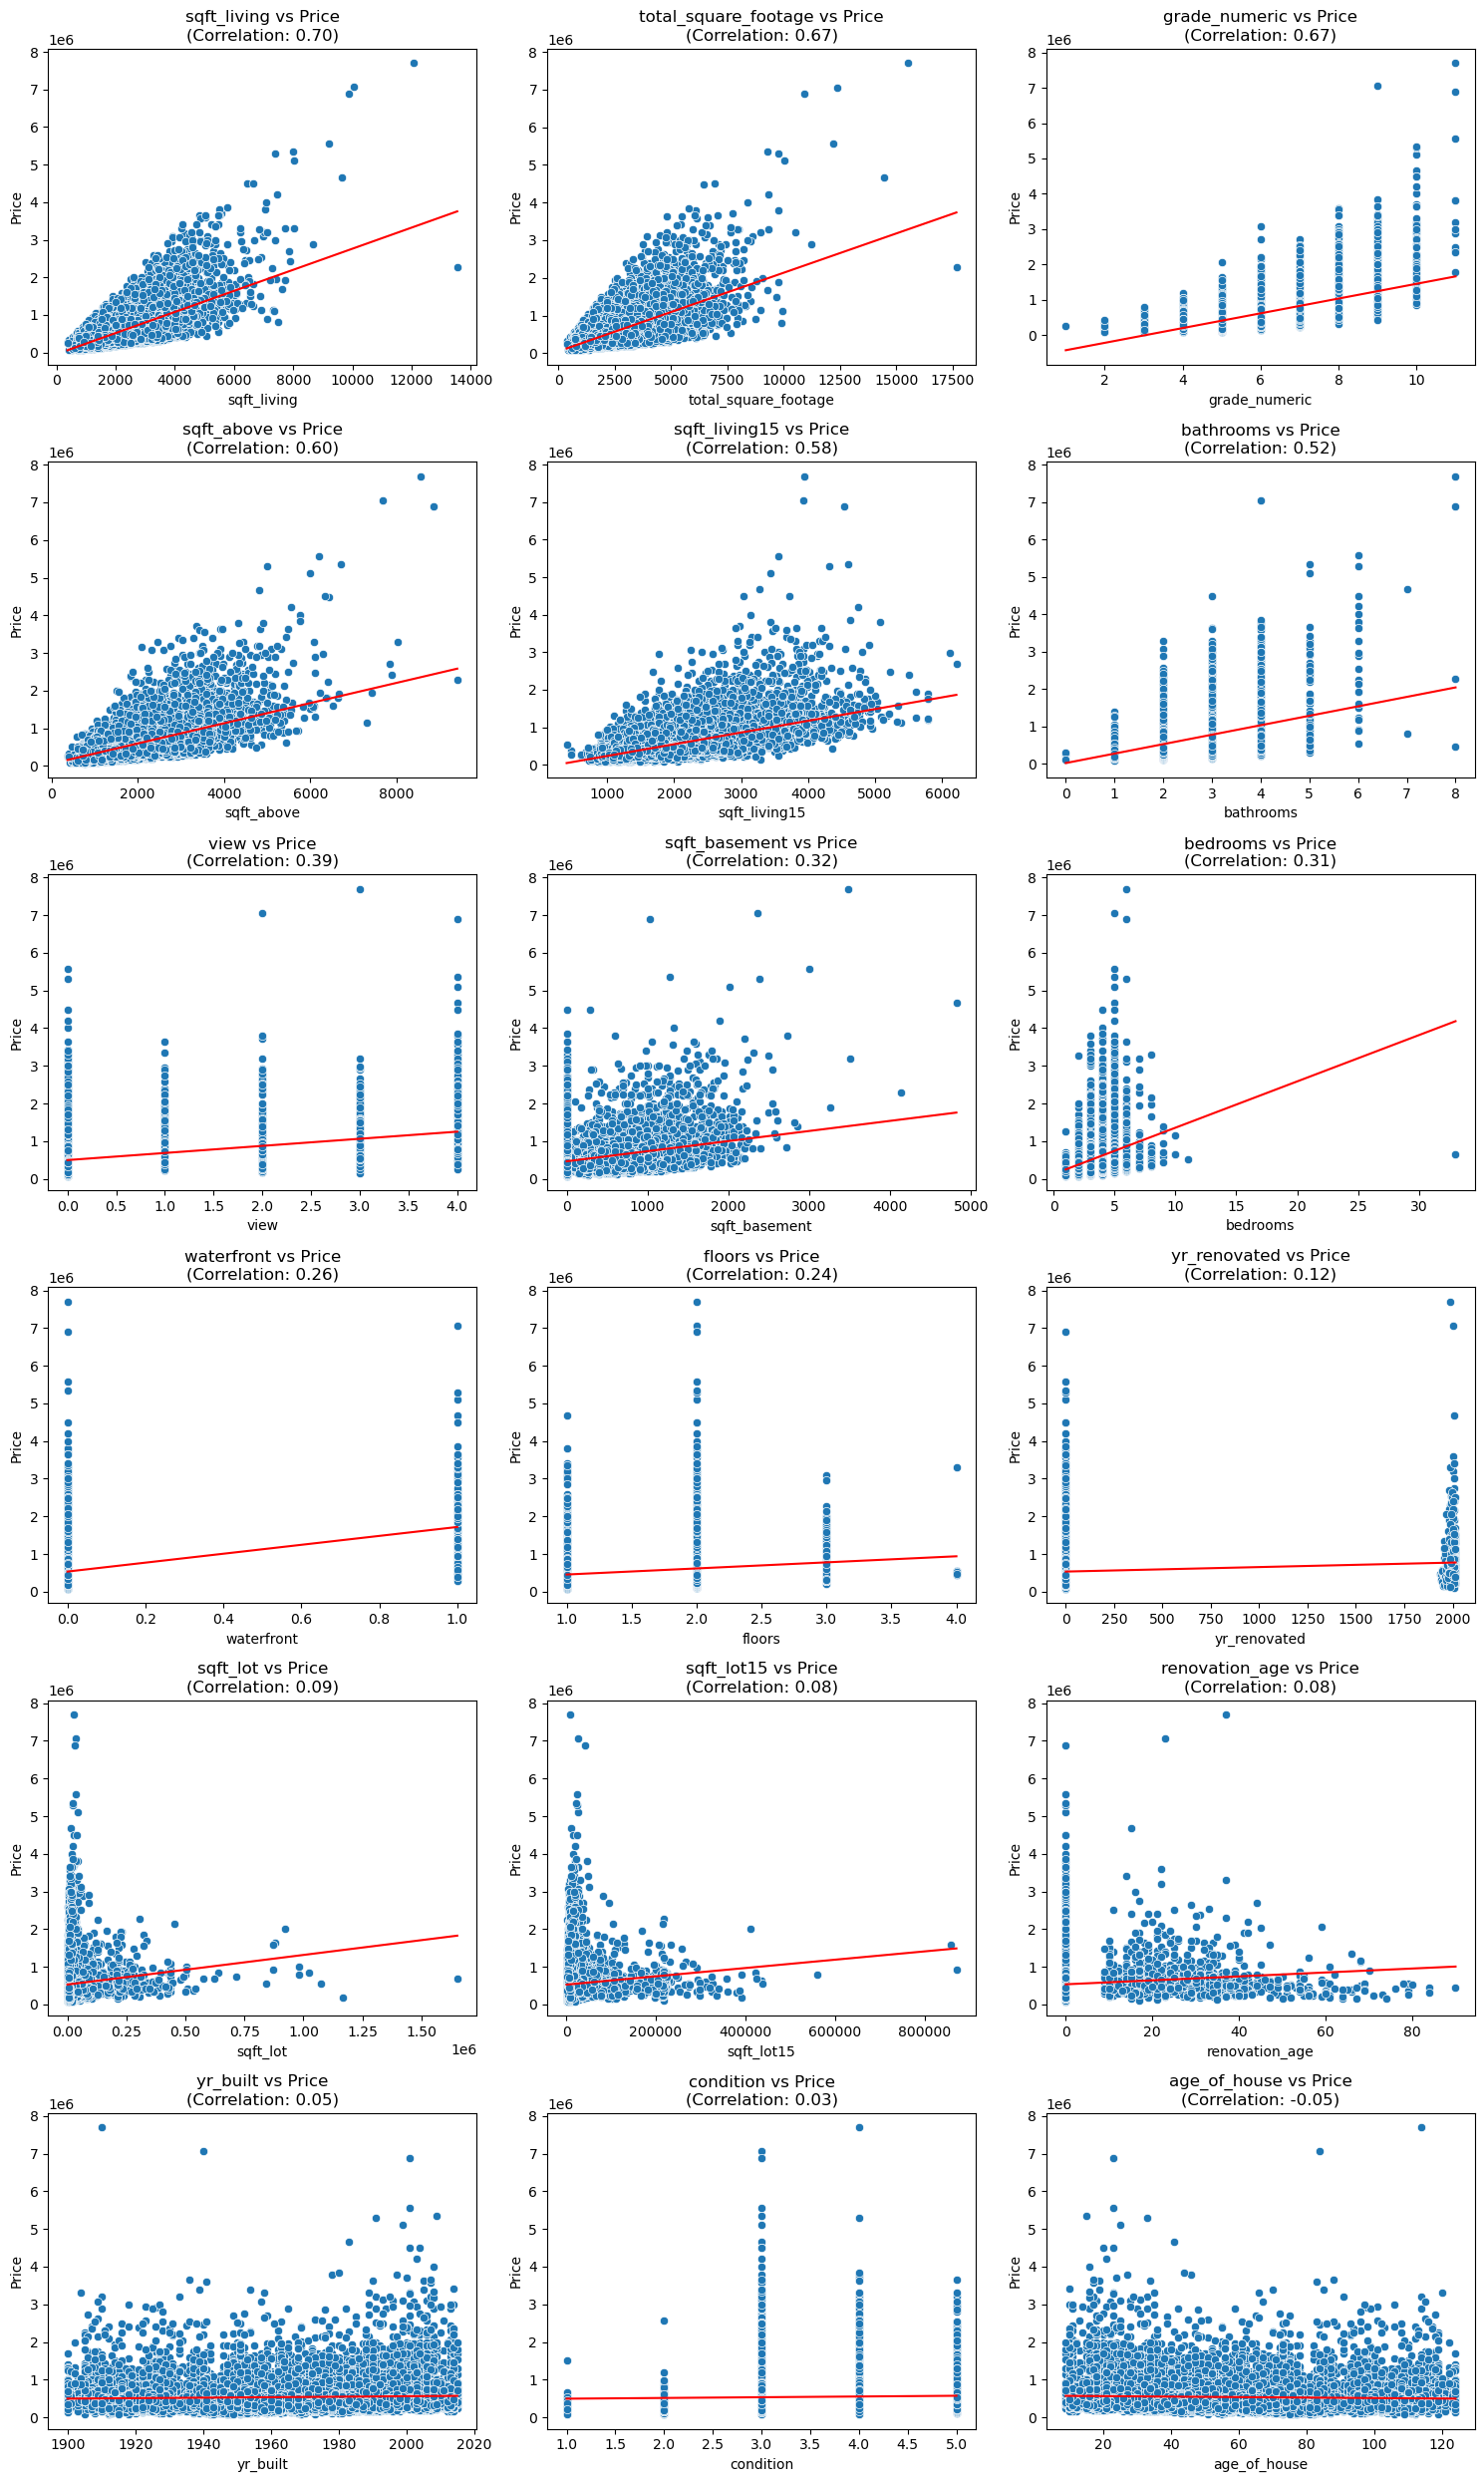

In [29]:
# List of columns to plot against price
columns_to_plot = [
    'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 
    'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 
    'renovation_age', 'yr_built', 'condition', 'age_of_house'
]

# Number of columns
num_cols = len(columns_to_plot)

# Set up the plot grid
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column against price
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.scatterplot(data=data, x=col, y='price', ax=ax)
    # Calculate the correlation coefficient
    corr_coef = np.corrcoef(data[col], data['price'])[0, 1]
    # Plot the red line for correlation
    ax.plot(np.unique(data[col]), np.poly1d(np.polyfit(data[col], data['price'], 1))(np.unique(data[col])), color='red')
    ax.set_title(f'{col} vs Price\n(Correlation: {corr_coef:.2f})')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Checking for outliers

In [30]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Columns to check for outliers
columns_to_check = [
    'price', 'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 
    'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 
    'renovation_age', 'yr_built', 'condition', 'age_of_house'
]

# Detect outliers for each column
outliers_dict = {col: detect_outliers_iqr(data, col) for col in columns_to_check}

# Summarize the number of outliers for each column
outliers_summary = {col: len(outliers) for col, outliers in outliers_dict.items()}

# Display the summary of outliers
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index', columns=['Number of Outliers'])
print(outliers_summary_df)

                      Number of Outliers
price                               1152
sqft_living                          568
total_square_footage                 541
grade_numeric                       1889
sqft_above                           600
sqft_living15                        503
bathrooms                           7675
view                                2104
sqft_basement                        556
bedrooms                             518
waterfront                           146
floors                                 7
yr_renovated                         740
sqft_lot                            2406
sqft_lot15                          2174
renovation_age                       740
yr_built                               0
condition                             28
age_of_house                           0


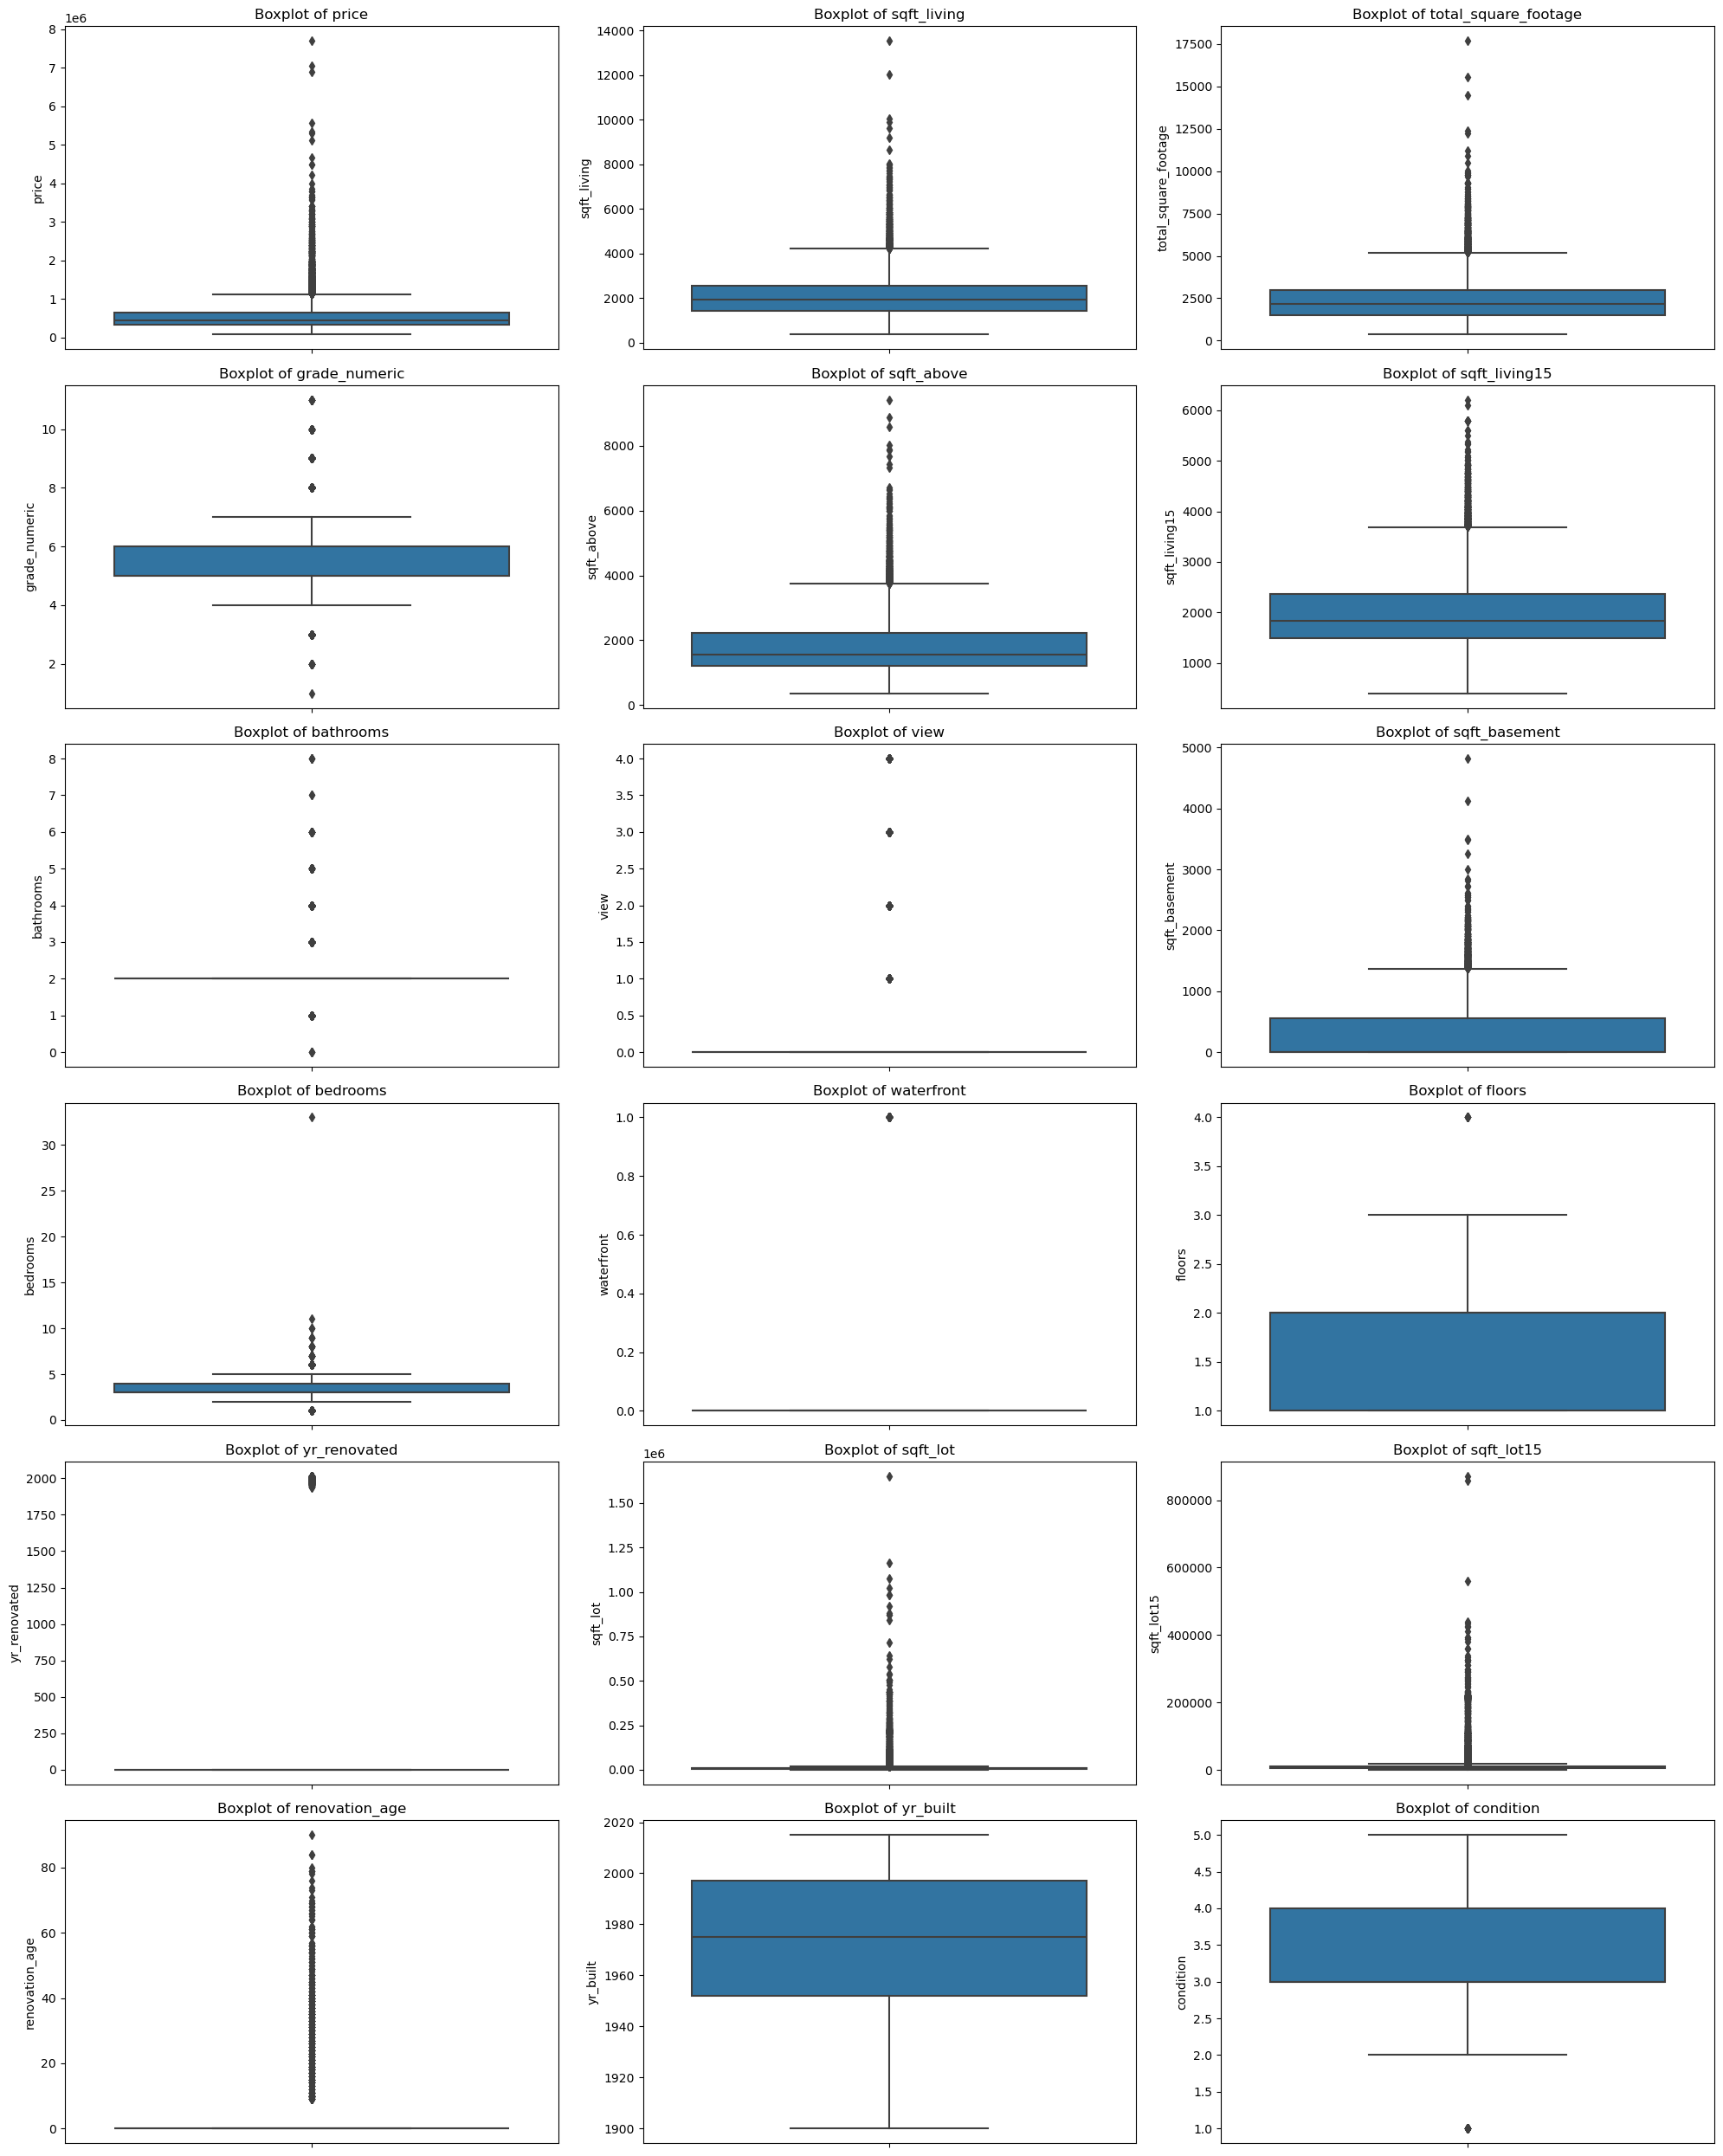

In [31]:
# Columns to check for outliers
columns_to_check = [
    'price', 'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 
    'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 
    'renovation_age', 'yr_built', 'condition'
]

# Set up the plot grid
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column to visualize outliers
for i, col in enumerate(columns_to_check):
    ax = axes[i]
    sns.boxplot(data=data, y=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Simple Liner Regression Model
For our first simple regression model, we will use `sqft_living`, since it showed the highest correlation.

## `sqft_living` as the predictor (corr: 0.7019)

1. We'll split the dataset into training and testing sets using an 80-20 split.

2. Then we use StandardScaler to standardize the features into a similar scale.

3. Then we create and train the model.

4. and make predictions using the test set.

5. Finally we evaluate the performance of the model, using r-squared, mean absolute error (mae), the coefficient and the intercept.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select only sqft_living as the predictor
X_single = data[['sqft_living']]
y = data['price']

# Split the data into training and testing sets
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_single = scaler.fit_transform(X_train_single)
X_test_single = scaler.transform(X_test_single)

# Create and train the simple linear regression model
model_single = LinearRegression()
model_single.fit(X_train_single, y_train)

# Predict on the test set
y_pred_single = model_single.predict(X_test_single)

# Evaluate the model
r2_single = r2_score(y_test, y_pred_single)
mae_single = mean_absolute_error(y_test, y_pred_single)
coefficient_single = model_single.coef_[0]
intercept_single = model_single.intercept_

r2_single, mae_single, coefficient_single, intercept_single


(0.48502868963245516, 175360.86597086905, 259509.0552764138, 541250.3189775909)

### Model evaluation
* R-squared value: 0.485

* Mean Absolute Error (MAE): 175,360.87

* Coefficient for sqft_living: 259,509.06

* Intercept: 541,250.32

### Interpretation
1. R-squared value:

    * The R-squared value of 0.485 indicates that **approximately 48.5% of the variance in home prices can be explained by the square footage of the living area** (sqft_living). 

    * This suggests that while sqft_living is an important factor, more features are needed to better explain the variability in home prices.

2. Mean Absolute Error (MAE):

    * The MAE of 175,360.87 indicates that, **on average, the model's predictions are off by about $175,360**.

    * This is a significant error, highlighting that relying solely on sqft_living to predict home prices may lead to considerable inaccuracies.

3. Coefficient for sqft_living:

    The coefficient of 259,509.06 implies that **for every additional square foot of living space, the home price increases by approximately $259,509**, *assuming all other factors remain constant*. 
    
    * This large coefficient indicates a strong positive relationship between living space and home price.

4. Intercept:

    * The intercept of 541,250.32 suggests that if a house had zero square feet of living space (which is not practically possible), the model would predict a **baseline price of $541,250**. 
    
    * This intercept represents the base value of a home, independent of its living space.

### Visualization of this model's results

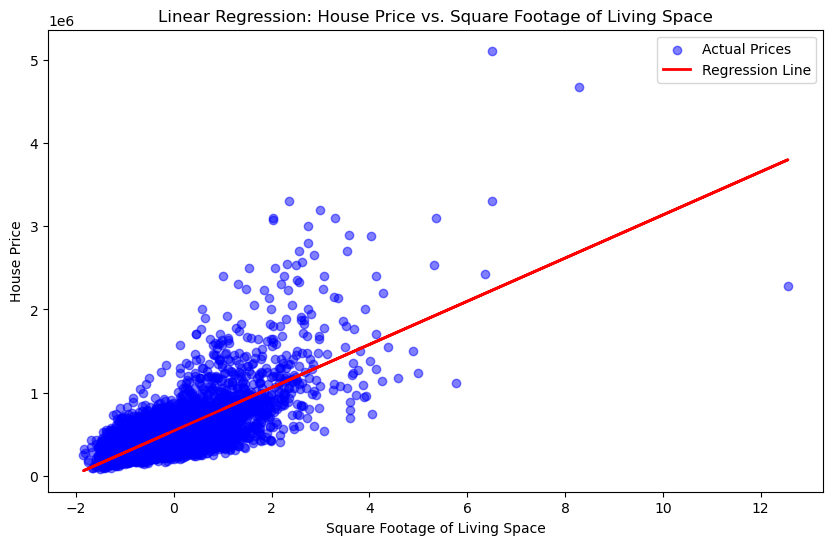

In [33]:
# Visualize the simple linear regression model's results

# Scatter plot of the actual house prices vs. sqft_living
plt.figure(figsize=(10, 6))
plt.scatter(X_test_single, y_test, color='blue', alpha=0.5, label='Actual Prices')

# Plot the regression line
plt.plot(X_test_single, y_pred_single, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Square Footage of Living Space')
plt.ylabel('House Price')
plt.title('Linear Regression: House Price vs. Square Footage of Living Space')
plt.legend()

# Display the plot
plt.show()

* The blue points represent the actual prices, and the red line represents the regression line obtained from our linear regression model.

* The scatter plot shows a general upward trend, indicating that as the square footage of living space increases, the house prices tend to increase.

* The regression line captures this trend, showing a positive relationship between square footage and house price.
However, there is considerable scatter around the regression line, indicating variability in house prices that is not captured by sqft_living alone. 

* This further supports the need for additional features to improve the model's predictive power.

### Plotting the residuals

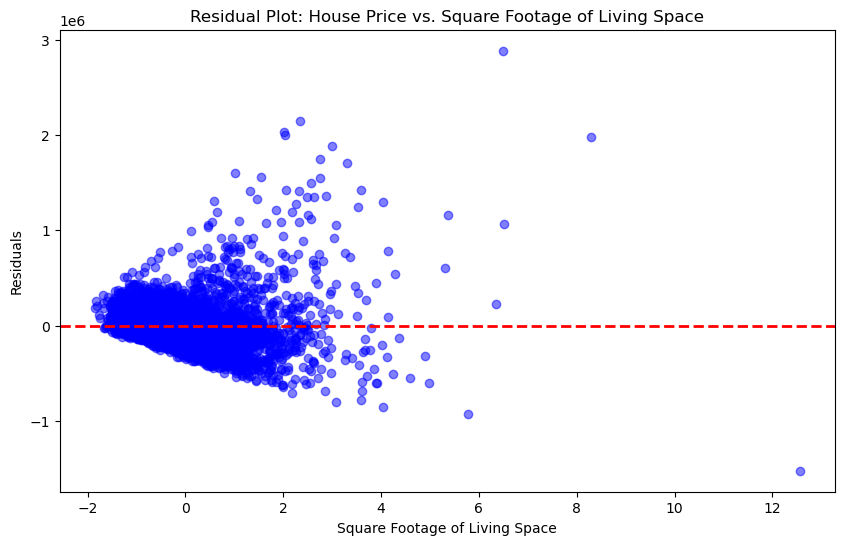

In [34]:
# Calculate residuals
residuals = y_test - y_pred_single

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(X_test_single, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Residuals')
plt.title('Residual Plot: House Price vs. Square Footage of Living Space')

# Display the plot
plt.show()

### Observations:
1. Random Distribution Around Zero:

    The residuals appear to be randomly distributed around the horizontal line at zero. 
    
    This indicates that the model does not exhibit systematic errors and the linear relationship is a reasonable approximation for the data.

2. Variance of Residuals:

    The spread of residuals increases with larger values of sqft_living, suggesting heteroscedasticity (non-constant variance of residuals).
    
    This means the model's prediction errors increase with larger homes.

3. Potential Outliers:

    There are some points with large residuals, indicating potential outliers where the model's predictions significantly deviate from the actual values.
    
### Now lets try log transormation to address heteroscedestacity
* we can apply a log transformation to both the dependent variable (house prices) and the predictor (sqft_living) 

* This would help in improving the model by:
    * handling the skewewd data: both the price and sqft_living are right skewed as shown earlier. Log transformation normalizes both variables.

    * reducing heteroscedasticity: stabilizing the varriance of residuals, resulting in more reliable models.

    * reducing the imact of outliers: makinig the model less sensitive to outliers.

    * improving the linearity between the variables

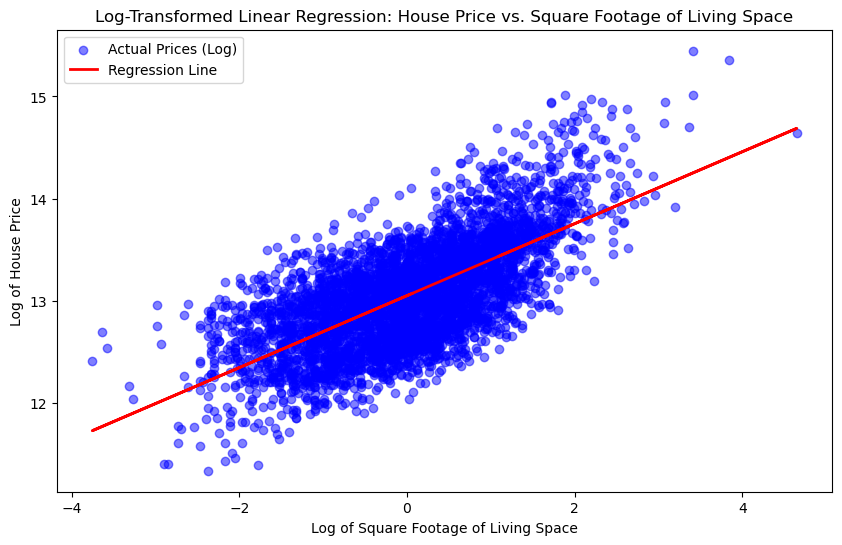

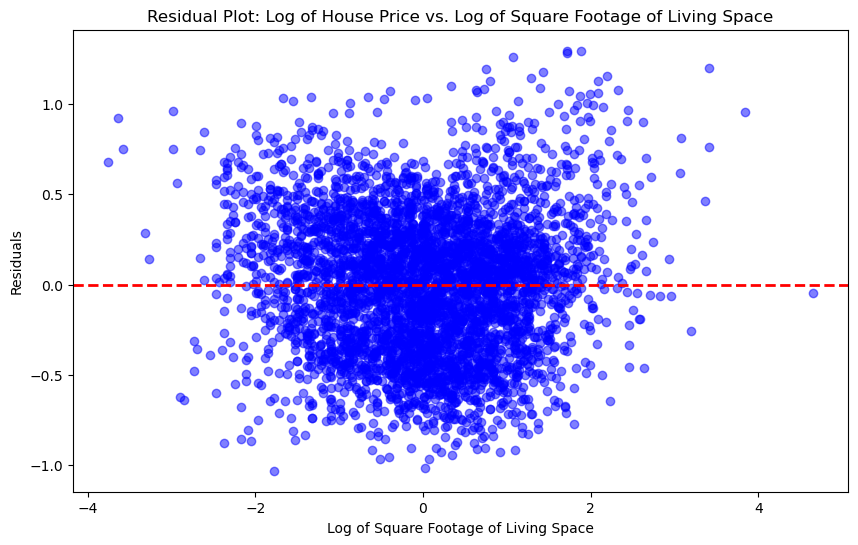

(0.46333021472755576,
 0.31323458669092974,
 0.3519420389359213,
 13.051041130755644)

In [35]:
# Apply log transformation to both the target variable (price) and the predictor variable (sqft_living)
data['log_price'] = np.log(data['price'])
data['log_sqft_living'] = np.log(data['sqft_living'])

# Select log-transformed features
X_log_single = data[['log_sqft_living']]
y_log = data['log_price']

# Split the data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log_single, y_log, test_size=0.2, random_state=42)

# Standardize the features
X_train_log = scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)

# Create and train the linear regression model on log-transformed data
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# Predict on the test set
y_pred_log = model_log.predict(X_test_log)

# Evaluate the model
r2_log = r2_score(y_test_log, y_pred_log)
mae_log = mean_absolute_error(y_test_log, y_pred_log)
coefficient_log = model_log.coef_[0]
intercept_log = model_log.intercept_

# Visualize the model's results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Actual Prices (Log)')
plt.plot(X_test_log, y_pred_log, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Log of Square Footage of Living Space')
plt.ylabel('Log of House Price')
plt.title('Log-Transformed Linear Regression: House Price vs. Square Footage of Living Space')
plt.legend()
plt.show()

# Calculate residuals
residuals_log = y_test_log - y_pred_log

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, residuals_log, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Log of Square Footage of Living Space')
plt.ylabel('Residuals')
plt.title('Residual Plot: Log of House Price vs. Log of Square Footage of Living Space')
plt.show()

r2_log, mae_log, coefficient_log, intercept_log


### Model Evaluation with Log Transformation
1. R-squared value:

    The R-squared value of 0.463 indicates that approximately 46.3% of the variance in the log-transformed home prices can be explained by the square footage of the living area (sqft_living). 
    
    This is slightly lower than the untransformed model, suggesting that while the log transformation addresses heteroscedasticity, it does not significantly improve the explanatory power.

2. Mean Absolute Error (MAE):

    The MAE of 0.313 (in log-transformed terms) The MAE of 0.313 indicates that, on average, the model's predictions of the log-transformed home prices are off by about 0.313. 
    
    This error metric is in log terms and indicates improved accuracy when predicting the log-transformed prices.

3. Coefficient for sqft_living:

    The coefficient of 0.352 implies that for every 1% increase in the square footage of living space, the home price increases by approximately 0.352%, assuming all other factors remain constant. This indicates a positive relationship between the log-transformed variables.

4. Intercept:

    The intercept of 13.051 suggests the log-transformed baseline price when the square footage is zero. This value is more abstract due to the log transformation but indicates the base value of a home independent of its living space.

Visualization of Model's Results

1. The scatter plot

    The scatter plot shows the relationship between the actual log-transformed house prices and the log-transformed square footage of living space, with the regression line indicating the model's predictions.

    The general upward trend confirms the positive relationship between the log-transformed variables

2. Residual Plot: 

    The residuals appear to be more evenly distributed around the horizontal line at zero, indicating that the log transformation has helped address heteroscedasticity.
    
    There is still some variability, but the pattern is less pronounced compared to the untransformed model.

### Conclusion
While the log transformation addresses heteroscedasticity and improves the distribution of residuals, it does not significantly enhance the explanatory power of the model. 

Additional features may be required to better capture the variability in home prices.

## Feature Selection

First, we will start with features that have a positive correlation with price.

In [36]:
positively_correlated_features = [
    'sqft_living', 'total_square_footage', 'grade_numeric', 'sqft_above', 
    'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'floors', 
    'yr_renovated', 'sqft_lot', 'renovation_age', 'sqft_lot15', 'yr_built', 'condition'
]

In [37]:
# Building a Linear Regression Model with all positively correlated features

# Select the features and target variable
X = data[positively_correlated_features]
y = data['price']

# Apply log transformation
X_log_transformed = np.log1p(X)
y_log_transformed = np.log1p(y)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_log_transformed, y_log_transformed, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Use the test data to predict
y_pred = model.predict(X_test_scaled)

# Evaluate the model using R-squared and Mean Absolute Error (MAE)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
coefficients = model.coef_
intercept = model.intercept_

# Prepare the results for display
evaluation_results = {
    'R-squared': r_squared,
    'Mean Absolute Error': mae,
    'Coefficients': coefficients,
    'Intercept': intercept
}
evaluation_results


{'R-squared': 0.6596192379295486,
 'Mean Absolute Error': 0.24363892860621464,
 'Coefficients': array([ 0.49598862, -0.33439165,  0.23197501, -0.05519739,  0.09026951,
         0.04511235,  0.0483528 ,  0.09039252, -0.04499233,  0.03822976,
         0.06464663, -0.01391463, -0.05804231, -0.02803876, -0.15899594,
         0.02401509]),
 'Intercept': 13.051043571197793}

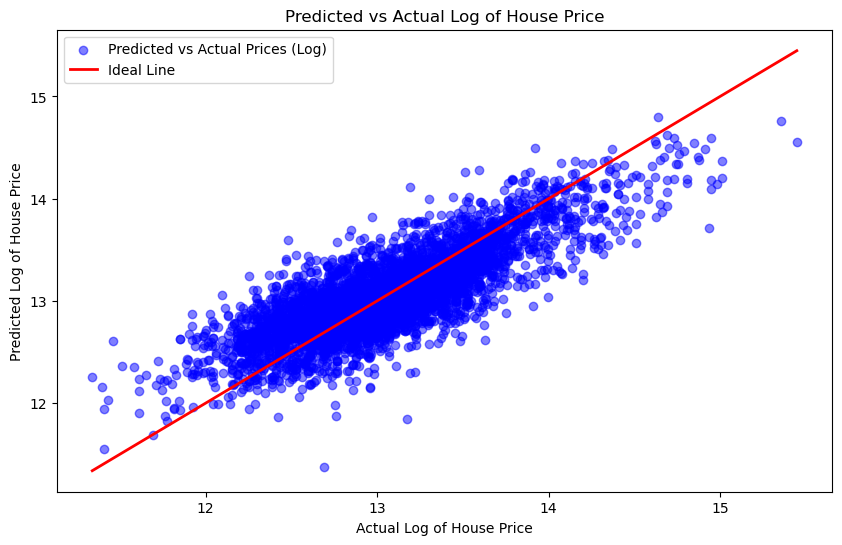

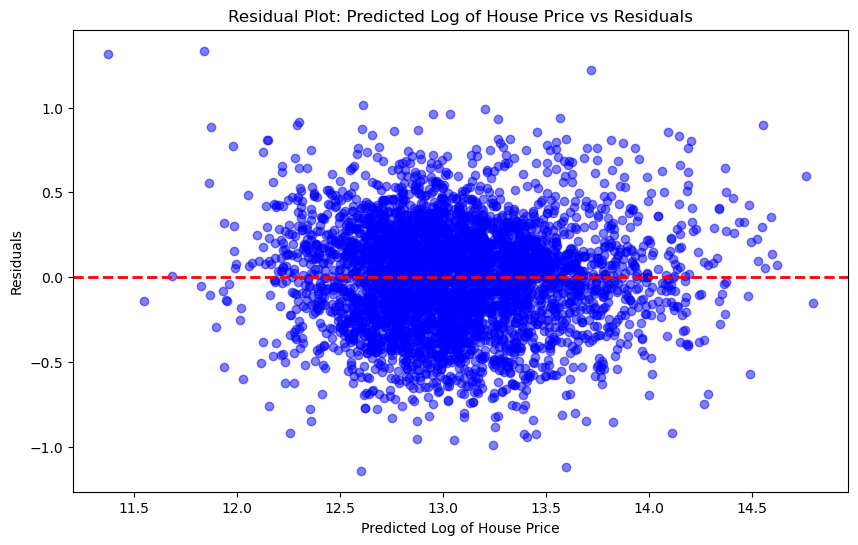

In [38]:
# Visualize the model's results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual Prices (Log)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Log of House Price')
plt.ylabel('Predicted Log of House Price')
plt.title('Predicted vs Actual Log of House Price')
plt.legend()
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Log of House Price')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted Log of House Price vs Residuals')
plt.show()


### Interpretation
1. **R-squared (R²): 0.6596** (Explains 65.96% of our varriance) This is higher than the simple model that we had.
2. **Mean Absolute Error (MAE): 0.2436** (lower absolute error) 
3. **Coefficients:** The coefficients indicate the strength and direction of the relationship between each feature and the log-transformed price. Positive coefficients suggest a positive relationship, while negative coefficients indicate a negative relationship.
    * sqft_living: 0.4959
    * total_square_footage: -0.3344
    * grade_numeric: 0.2320
    * sqft_above: -0.0552
    * sqft_living15: 0.0903
    * bathrooms: 0.0451
    * view: 0.0484
    * sqft_basement: 0.0904
    * bedrooms: -0.0450
    * floors: 0.0382
    * yr_renovated: 0.0646
    * sqft_lot: -0.0139
    * renovation_age: -0.0580
    * sqft_lot15: -0.0280
    * yr_built: -0.1590
    * condition: 0.0240
4. Intercept: 13.0510

### Visualizations:
* Predicted vs Actual Log of House Price:
    * Most points are close to the red line, indicating a good fit.

* Residual Plot:
    * This plot shows the residuals (errors) plotted against the predicted log of house prices.
    * The red horizontal line represents zero residuals.
    * The residuals are fairly evenly distributed around the horizontal line, suggesting that there is no clear pattern and that the model's assumptions are reasonably met.

These visualizations help in understanding the performance and reliability of the model.


### Analysing this model
We have a better performing model, with a higher R-squared and a lower MAE

In this model, we have used all features that are positively correlated to price. 

However, this use of multiple predictors makes our model more complex, and susceptible to multicollinearity, if our varriables are highly correlated with each other. 


## Checking for multicollinearity

In [39]:
import statsmodels.api as sm

# Adding a constant to the model
X_train_const = sm.add_constant(X_train_scaled)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Get the variance inflation factor (VIF) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train_const, i) for i in range(1, X_train_const.shape[1])]

# Order VIF in descending order
vif_sorted = vif.sort_values(by="VIF", ascending=False)
vif_sorted

,Variable,VIF
0,sqft_living,1088.154669
1,total_square_footage,703.285485
3,sqft_above,110.384805
10,yr_renovated,36.996836
12,renovation_age,36.861173
7,sqft_basement,16.106295
11,sqft_lot,6.816768
13,sqft_lot15,6.580700
2,grade_numeric,2.964302
4,sqft_living15,2.734505


### High VIF Values:
* We have some highly collinear features.

* Features such as sqft_living, total_square_footage, sqft_above, sqft_basement, yr_renovated, and renovation_age have extremely high VIF values (generally, **a VIF above 10 indicates significant multicollinearity**).

* This suggests that these features are highly correlated with each other, which can lead to instability in the regression coefficients.

### Next steps
1. Combine sqft_living and total_square_footage.
2. Combine yr_renovated and renovation_age.
3. Recalculate VIF to check for improvements.


In [40]:
# Combine sqft_living and total_square_footage into a new feature
data['combined_sqft'] = data['sqft_living'] + data['total_square_footage']

# Combine yr_renovated and renovation_age into a new feature
data['combined_renovation'] = data['yr_renovated'] + data['renovation_age']

# Select the features and target variable with new combined features
combined_features = [
    'combined_sqft', 'grade_numeric', 'sqft_above', 'sqft_living15', 'bathrooms', 
    'view', 'sqft_basement', 'bedrooms', 'floors', 'combined_renovation', 
    'sqft_lot', 'sqft_lot15', 'yr_built', 'condition'
]

X_combined = data[combined_features]
y_combined = data['price']

# Apply log transformation
X_combined_log_transformed = np.log1p(X_combined)
y_combined_log_transformed = np.log1p(y_combined)

# Split the data into training and testing sets (80/20 split)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined_log_transformed, y_combined_log_transformed, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
X_train_combined_scaled = scaler.fit_transform(X_train_combined)
X_test_combined_scaled = scaler.transform(X_test_combined)

# Adding a constant to the model
X_train_combined_const = sm.add_constant(X_train_combined_scaled)

# Fit the OLS model
ols_model_combined = sm.OLS(y_train_combined, X_train_combined_const).fit()

# Calculate VIF for each feature
vif_combined = pd.DataFrame()
vif_combined["Variable"] = combined_features
vif_combined["VIF"] = [variance_inflation_factor(X_train_combined_const, i) for i in range(1, X_train_combined_const.shape[1])]

# Order VIF in descending order
vif_combined_sorted = vif_combined.sort_values(by="VIF", ascending=False)
vif_combined_sorted


,Variable,VIF
0,combined_sqft,17.376278
2,sqft_above,15.874653
10,sqft_lot,6.816142
6,sqft_basement,6.649224
11,sqft_lot15,6.578634
1,grade_numeric,2.953258
3,sqft_living15,2.733684
4,bathrooms,2.354050
8,floors,2.028953
7,bedrooms,1.854964


### Interpretation

The high VIF values for combined_sqft and sqft_above indicate some remaining multicollinearity, but it's significantly reduced compared to the previous values.

Most other features now have acceptable VIF values, suggesting minimal multicollinearity.

### Next Steps
1. Lets now create a model with the combined features and evaluate it

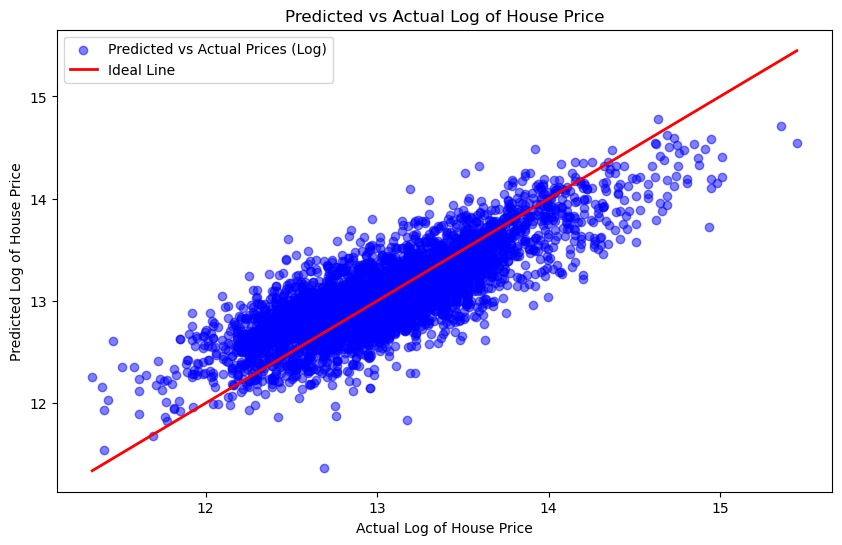

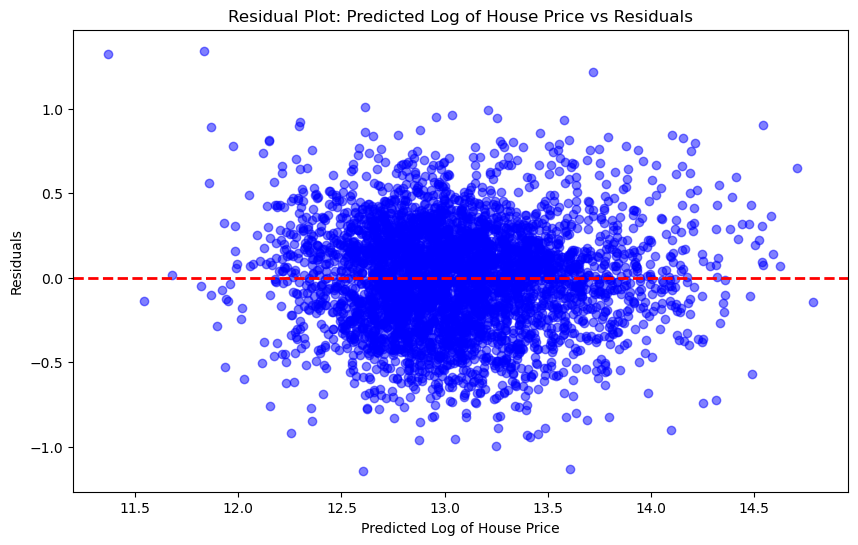

{'R-squared': 0.6586001927777309,
 'Mean Absolute Error': 0.24379960600671394,
 'Coefficients': array([ 0.06844594,  0.23376841,  0.08165254,  0.09006365,  0.04678673,
         0.04883613,  0.047369  , -0.04442742,  0.03846256,  0.00724669,
        -0.01406598, -0.02861284, -0.16008548,  0.02357888]),
 'Intercept': 13.051043571197793}

In [41]:
# Create and train the linear regression model
model_combined = LinearRegression()
model_combined.fit(X_train_combined_scaled, y_train_combined)

# Use the test data to predict
y_pred_combined = model_combined.predict(X_test_combined_scaled)

# Evaluate the model using R-squared and Mean Absolute Error (MAE)
r_squared_combined = r2_score(y_test_combined, y_pred_combined)
mae_combined = mean_absolute_error(y_test_combined, y_pred_combined)
coefficients_combined = model_combined.coef_
intercept_combined = model_combined.intercept_

# Prepare the results for display
evaluation_results_combined = {
    'R-squared': r_squared_combined,
    'Mean Absolute Error': mae_combined,
    'Coefficients': coefficients_combined,
    'Intercept': intercept_combined
}

# Visualize the model's results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_combined, y_pred_combined, color='blue', alpha=0.5, label='Predicted vs Actual Prices (Log)')
plt.plot([min(y_test_combined), max(y_test_combined)], [min(y_test_combined), max(y_test_combined)], color='red', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Log of House Price')
plt.ylabel('Predicted Log of House Price')
plt.title('Predicted vs Actual Log of House Price')
plt.legend()
plt.show()

# Calculate residuals
residuals_combined = y_test_combined - y_pred_combined

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_combined, residuals_combined, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Log of House Price')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted Log of House Price vs Residuals')
plt.show()

evaluation_results_combined


### Model Evaluation with Combined Features
1. R-squared: 0.659

    This indicates that approximately 65.9% of the variance in log-transformed house prices can be explained by the combined features.

    This is comparable to the previous multiple predictor model, indicating that the combined features retain explanatory power.

2. Mean Absolute Error (MAE): 0.244

    This indicates that, on average, the model's predictions of log-transformed prices are off by about 0.244 log units.

    The MAE remains consistent with the previous model, indicating stable prediction accuracy.

3. Coefficients:

    The coefficients for each feature indicate the change in the log-transformed house price for a one-unit change in the log-transformed feature, holding other factors constant.

4. Intercept: 13.051

    This suggests that if all features were zero (which is not practically possible), the model would predict a baseline log-transformed price of 13.051.

#### Visualization
* Predicted vs Actual Prices (Log): 

    The points close to the red ideal line indicate good predictions.
    
* Residual Plot: 
    The residuals vs. predicted log-transformed prices are randomly distributed around zero, suggesting a well-fitted model.

### Interpretation
Combining features has successfully reduced multicollinearity while maintaining the model's explanatory power and prediction accuracy.

The model now has more interpretable and reliable coefficients, reducing redundancy.

## Further feature selection
Now we want to determine the features that are most predictive. 

For this, we can use a combination of the Coefficients of the Linear Regression model and Recursive Feature Elimination (FRE, that recursively removes less important features).

We already have the Coefficients of the Linear Regression model above

Next we can do Recursive Feature Elimination (RFE) with Cross-Validation (CV). This method will help identify the most important features that contribute to the model's performance.

Let's apply RFE with CV to select the best features:

In [42]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create the RFE object with a linear regression model
linear_regressor = LinearRegression()

# Perform RFE with cross-validation
rfe = RFE(estimator=linear_regressor, n_features_to_select=1, step=1)
rfe.fit(X_train_combined_scaled, y_train_combined)

# Get ranking of features
ranking = rfe.ranking_

# Combine feature names and their rankings
feature_ranking = pd.DataFrame({'Feature': combined_features, 'Ranking': ranking})
feature_ranking_sorted = feature_ranking.sort_values(by='Ranking')

# Display feature rankings
feature_ranking_sorted


,Feature,Ranking
1,grade_numeric,1
12,yr_built,2
2,sqft_above,3
6,sqft_basement,4
3,sqft_living15,5
11,sqft_lot15,6
5,view,7
4,bathrooms,8
0,combined_sqft,9
7,bedrooms,10


Above we have the Feature ranking using Recursive Feature Elimination. The features are ranked based on their importance to the model.

Next we can select the top 10 features based on FRE ranking, train a linear regression model with the selected features and then evaluate the model using R-Squared and MAE to compare performance.

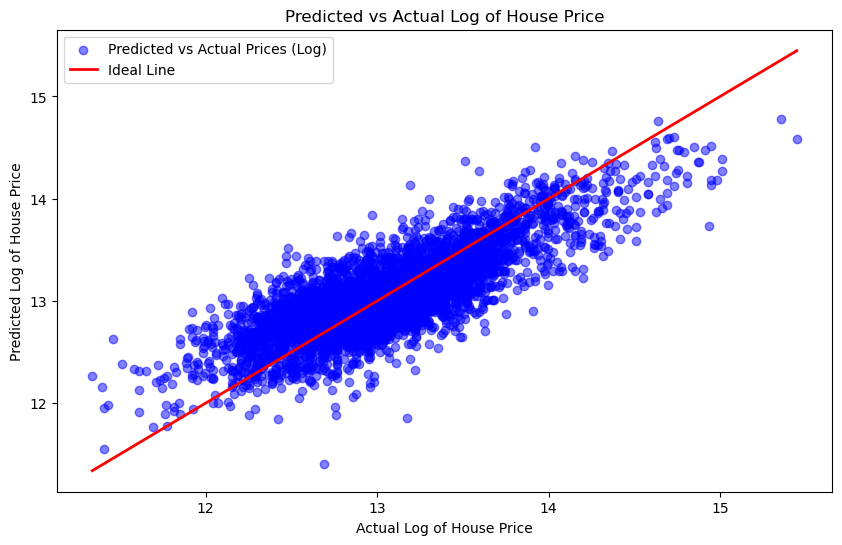

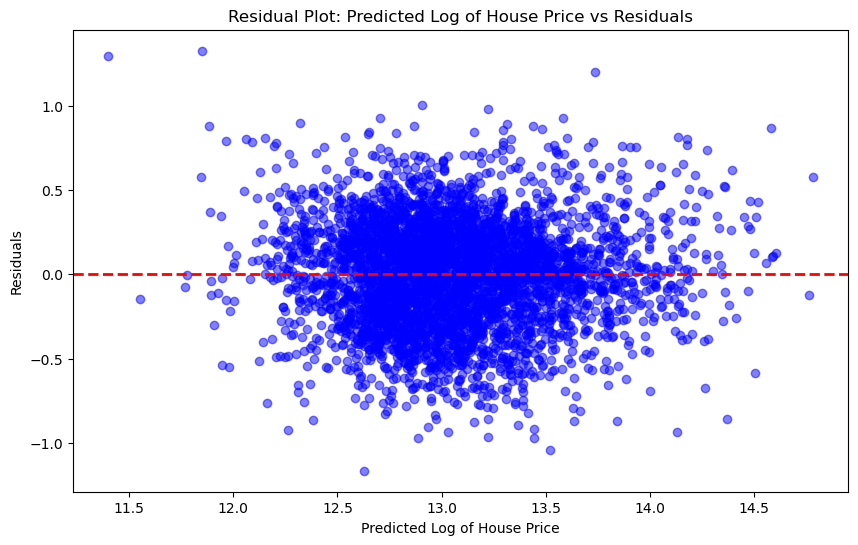

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


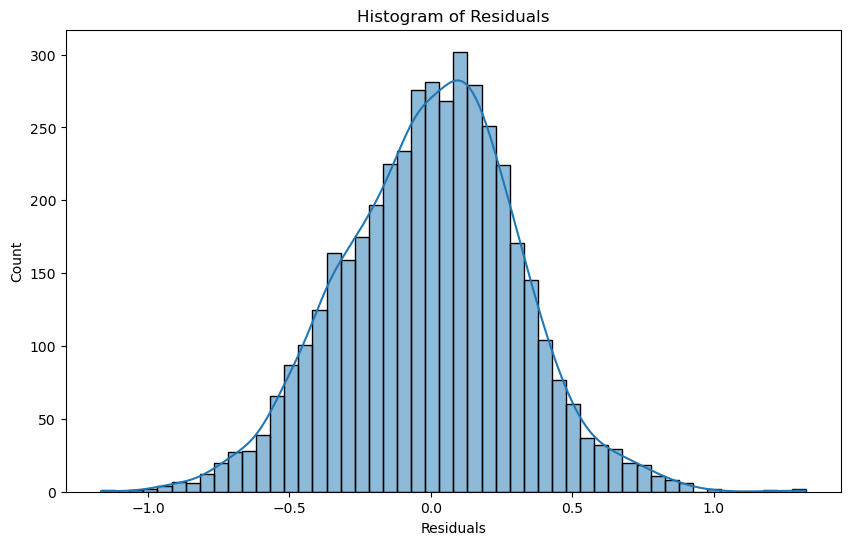

{'R-squared': 0.654428923335798,
 'Mean Absolute Error': 0.24558026345878667,
 'Coefficients': array([ 0.23756319, -0.16695684,  0.10692339,  0.04601594,  0.08594448,
        -0.05265455,  0.04944924,  0.0531547 ,  0.06037597, -0.04439332]),
 'Intercept': 13.051043571197793}

In [43]:
# Select the top 10 features based on RFE ranking
top_features = feature_ranking_sorted.head(10)['Feature'].tolist()

# Create dataset with top 10 features
X_top = data[top_features]
X_top_log_transformed = np.log1p(X_top)

# Split the data into training and testing sets (80/20 split)
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_log_transformed, y_combined_log_transformed, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

# Create and train the linear regression model
model_top = LinearRegression()
model_top.fit(X_train_top_scaled, y_train_top)

# Use the test data to predict
y_pred_top = model_top.predict(X_test_top_scaled)

# Evaluate the model using R-squared and Mean Absolute Error (MAE)
r_squared_top = r2_score(y_test_top, y_pred_top)
mae_top = mean_absolute_error(y_test_top, y_pred_top)
coefficients_top = model_top.coef_
intercept_top = model_top.intercept_

# Prepare the results for display
evaluation_results_top = {
    'R-squared': r_squared_top,
    'Mean Absolute Error': mae_top,
    'Coefficients': coefficients_top,
    'Intercept': intercept_top
}

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test_top, y_pred_top, color='blue', alpha=0.5, label='Predicted vs Actual Prices (Log)')
plt.plot([min(y_test_top), max(y_test_top)], [min(y_test_top), max(y_test_top)], color='red', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Log of House Price')
plt.ylabel('Predicted Log of House Price')
plt.title('Predicted vs Actual Log of House Price')
plt.legend()
plt.show()

# Calculate residuals
residuals_top = y_test_top - y_pred_top

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_top, residuals_top, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Log of House Price')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted Log of House Price vs Residuals')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_top, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

evaluation_results_top


### Model Evaluation with Top 10 Features
1. R-squared: 0.654

    This indicates that approximately 65.4% of the variance in log-transformed house prices can be explained by the top 10 features.

    This is comparable to the model with all features, suggesting that the top 10 features capture most of the explanatory power.

2. Mean Absolute Error (MAE): 0.246

    This indicates that, on average, the model's predictions of log-transformed prices are off by about 0.246 log units.
    
    The MAE is consistent with the previous models, indicating stable prediction accuracy.

### Interpretation
The model with the top 10 features maintains similar performance to the model with all features, indicating that these features are indeed the most predictive.

### Conclusion
The Recursive Feature Elimination (RFE) method has successfully identified the most important features for predicting house prices.

The selected top 10 features provide a simpler and interpretable model with comparable performance to the full model.

## Model Validation
Next we can validate this model using k-fold cross validation.

Here, the dataset is divided into k subsets (folds). The model is then trained on k-1 folds and tested on the remaining folds. The process is repeated k times, with each fold used as the test set once. the results are then averaged to provide a more reliable estimate of the model performance. We will compute the average R-Squared and MAE across all folds.

This ensures model robustness and to ensure its generalisability.

In [44]:
from sklearn.model_selection import cross_val_score, KFold

# Define the model
model_cv = LinearRegression()

# Define the k-fold cross-validation configuration
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# Perform cross-validation for R-squared
cv_results_r2 = cross_val_score(model_cv, X_top_log_transformed, y_combined_log_transformed, cv=kfold, scoring='r2')

# Perform cross-validation for Mean Absolute Error (MAE)
cv_results_mae = cross_val_score(model_cv, X_top_log_transformed, y_combined_log_transformed, cv=kfold, scoring='neg_mean_absolute_error')

# Calculate mean and standard deviation of R-squared and MAE
mean_r2 = np.mean(cv_results_r2)
std_r2 = np.std(cv_results_r2)
mean_mae = -np.mean(cv_results_mae)
std_mae = np.std(cv_results_mae)

# Prepare the results for display
cv_evaluation_results = {
    'Mean R-squared': mean_r2,
    'Std R-squared': std_r2,
    'Mean MAE': mean_mae,
    'Std MAE': std_mae
}

cv_evaluation_results


{'Mean R-squared': 0.6484589716903073,
 'Std R-squared': 0.010733059197080504,
 'Mean MAE': 0.24502443687000336,
 'Std MAE': 0.0024429721839438635}

### Cross-Validation Results
Using 10-fold cross-validation, we obtain the following results for the model with the top 10 features:

1. Mean R-squared: 0.648

    This indicates that, on average, 64.8% of the variance in log-transformed house prices is explained by the model across all folds.

    The standard deviation of 0.011 suggests that the model's performance is consistent across different subsets of the data.

2. Mean MAE: 0.245

    This indicates that, on average, the model's predictions of log-transformed prices are off by about 0.245 log units across all folds.

    The standard deviation of 0.0024 suggests that the model's prediction accuracy is consistent across different subsets of the data.

### Interpretation
* The cross-validation results confirm that the model with the top 10 features performs well and consistently across different subsets of the data.

* The low standard deviations in both R-squared and MAE indicate that the model is not overfitting and generalizes well to unseen data.

### Conclusion
The combination of feature selection using RFE and model evaluation using k-fold cross-validation has resulted in a robust and reliable model for predicting house prices.

The top 10 features identified are essential predictors of house prices, and the model's performance is consistent and reliable.

## Statistical Testing for p-values and Confidence interval

Now we want to perform hypothesis testing of the coefficients of our chosen predictors to see if they are statistically significant at an alpha level of 0.05.

Also we want to generate confidence intervals that we can use in our recommendations.

Here we will use statsmodels library since it provides a more detailed statistical summary compared to scikit-learn



In [45]:
import statsmodels.api as sm

# Add a constant to the features (intercept term)
X_train_top_const = sm.add_constant(X_train_top_scaled)

# Fit the linear regression model using statsmodels
model_stats = sm.OLS(y_train_top, X_train_top_const).fit()

# Get the summary of the model
model_summary = model_stats.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3150.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:26:21   Log-Likelihood:                -4271.7
No. Observations:               17136   AIC:                             8565.
Df Residuals:                   17125   BIC:                             8651.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0510      0.002   5500.937      0.000      13.046      13.056
x1             0.2376      0.004     58.465      0.000       0.230       0.246
x2            -0.1670      0.003    -57.563      0.000      -0.173      -0.161
x3             0.1069      0.009     12.004      0.000       0.089       0.124
x4             0.0460      0.006      7.544      0.000       0.034       0.058
x5             0.0859      0.004     22.014      0.000       0.078       0.094
x6            -0.0527      0.003    -19.835      0.000      -0.058      -0.047
x7             0.0494      0.003     19.342      0.000       0.044       0.054
x8             0.0532      0.004     14.759      0.000       0.046       0.060
x9             0.0604      0.010      6.186      0.000       0.041       0.080
x10           -0.0444      0.003    -13.767      0.000      -0.051      -0.038
==============================================================================
Omnibus:                       66.611   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.426
Skew:                          -0.018   Prob(JB):                     2.31e-20
Kurtosis:                       3.354   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of Results
1. P-values:

    All coefficients have p-values of 0.000, indicating that they are statistically significant predictors of the target variable (log-transformed house prices). 
    
    This means we can reject the null hypothesis that the coefficients are equal to zero at a significance level of 0.05.

2. Confidence Intervals:

    The 95% confidence intervals for the coefficients provide a range within which we can be 95% confident that the true coefficient value lies. Since the confidence intervals do not include zero, it reinforces the statistical significance of the coefficients.

### Conclusion
The model summary indicates that all the top 10 features are significant predictors of house prices.

Next we can calculate the dollar imapct of the key features using the coefficients and the confidence interval.

In [46]:
# Coefficients from the linear regression model
coefficients = {
    'grade_numeric': 0.238,
    'yr_built': -0.167,
    'sqft_above': 0.107,
    'sqft_basement': 0.046,
    'sqft_living15': 0.086,
    'view': -0.053,
    'bathrooms': 0.049,
    'bedrooms': 0.053,
    'floors': 0.060,
    'combined_sqft': -0.044
}

# 95% Confidence Intervals for the coefficients
confidence_intervals = {
    'grade_numeric': [0.230, 0.246],
    'yr_built': [-0.173, -0.161],
    'sqft_above': [0.089, 0.124],
    'sqft_basement': [0.034, 0.058],
    'sqft_living15': [0.078, 0.094],
    'view': [-0.058, -0.047],
    'bathrooms': [0.044, 0.054],
    'bedrooms': [0.046, 0.060],
    'floors': [0.041, 0.080],
    'combined_sqft': [-0.051, -0.038]
}

# Average house price from the dataset
average_house_price = data['price'].mean()

# Calculate dollar impact
dollar_impact = {}
for feature, coef in coefficients.items():
    lower_bound, upper_bound = confidence_intervals[feature]
    impact = coef * average_house_price
    lower_impact = lower_bound * average_house_price
    upper_impact = upper_bound * average_house_price
    dollar_impact[feature] = {
        'impact': impact,
        'lower_bound': lower_impact,
        'upper_bound': upper_impact
    }

# Print the results
for feature, impact_values in dollar_impact.items():
    print(f"Feature: {feature}")
    print(f"  Dollar Impact: ${impact_values['impact']:,.2f}")
    print(f"  95% Confidence Interval: [${impact_values['lower_bound']:,.2f}, ${impact_values['upper_bound']:,.2f}]")
    print()


Feature: grade_numeric
  Dollar Impact: $128,963.02
  95% Confidence Interval: [$124,628.13, $133,297.91]

Feature: yr_built
  Dollar Impact: $-90,490.86
  95% Confidence Interval: [$-93,742.03, $-87,239.69]

Feature: sqft_above
  Dollar Impact: $57,979.17
  95% Confidence Interval: [$48,225.67, $67,190.82]

Feature: sqft_basement
  Dollar Impact: $24,925.63
  95% Confidence Interval: [$18,423.29, $31,427.96]

Feature: sqft_living15
  Dollar Impact: $46,600.08
  95% Confidence Interval: [$42,265.19, $50,934.97]

Feature: view
  Dollar Impact: $-28,718.66
  95% Confidence Interval: [$-31,427.96, $-25,467.49]

Feature: bathrooms
  Dollar Impact: $26,551.21
  95% Confidence Interval: [$23,841.90, $29,260.52]

Feature: bedrooms
  Dollar Impact: $28,718.66
  95% Confidence Interval: [$24,925.63, $32,511.69]

Feature: floors
  Dollar Impact: $32,511.69
  95% Confidence Interval: [$22,216.32, $43,348.91]

Feature: combined_sqft
  Dollar Impact: $-23,841.90
  95% Confidence Interval: [$-27,634

# Recommendations From Our Regression Model

Based on the linear regression model's findings, we can give some data-driven recommendations for home renovations that might increase the estimated values of homes. 

The recommendations are based on the coefficients and confidence intervals of the significant features.

## 1. Grade of the House (grade_numeric):

**Improving the overall grade of the house**, which represents the construction quality and design, can significantly increase the home's value. Grade of the house has the highest positive impact on the estimated value.

This can be achieved through high-quality renovations, modern designs, and premium materials.

**Dollar Impact: $128,963.02**, indicating that improving the grade of the house by one unit can increase its value by approximately $128,963.02, with a 95% Confidence Interval ranging from $124,628.13, $133,297.91.

## 2. Year Built (yr_built):

While the year built cannot be changed, **focusing on modernizing older homes through renovations can mitigate the negative impact of an older construction date**. 

Emphasize updating essential systems like plumbing, electrical, and HVAC to meet current standards.

## 3. Above Ground Living Area (sqft_above):

**Increasing the above-ground living area**, such as adding new rooms or expanding existing ones, can substantially raise the home's value. 

Focus on adding functional and attractive spaces like additional bedrooms or a modern kitchen.

## 4. Living Area in the 15 Nearest Houses (sqft_living15):

**Enhancing the surrounding living area** to be competitive with nearby homes can increase value. This can include adding square footage or upgrading the quality of living spaces.

## 5. View (view):

**Improving the view** can also raise a home's value, although it may be less feasible. Landscaping and removing obstacles that block views can be beneficial.


In [1]:
print ('Goodbye')

Goodbye
